In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#OJO extra para que funcione algunos con mas de una neurona de salida
from sklearn.multioutput import MultiOutputRegressor

In [2]:
ruta_platos_peruano = "dataset_para_modelo.xlsx"
dataset = pd.read_excel(ruta_platos_peruano)

lista_ingredientes_principales=['Yuca', 'Huevo', 'Pollo', 'Carne', 'Choclo', 'Lomo', 'Pescado', 'Cuy', 'Papa', 'Pasta', 'Camote', 'Papas Fritas', 'Camarones', 'Cerdo', 'Arroz', 'Langostinos', 'Mondongo', 'Frijoles', 'Carne Molida']

#para este modelo no le interesa este resultado
dataset = dataset.drop('Total imp. ingredients result (g)', axis=1) 

#convertir a array
dataset['F.D. List(Important Ingredient/Portion)'] = dataset['F.D. List(Important Ingredient/Portion)'].apply(ast.literal_eval)
dataset['F.D. List Result(Important Ingredient/Portion)'] = dataset['F.D. List Result(Important Ingredient/Portion)'].apply(ast.literal_eval)

In [3]:
#transformar en un array de porcentajes
array_percentage=[]
for i in range(0,dataset.shape[0]):
    arr=[]
    for j in range(0,len(lista_ingredientes_principales)):
        check=False
        for k in dataset['F.D. List(Important Ingredient/Portion)'][i]:
            if(lista_ingredientes_principales[j]==k[0]):
                arr.append(int(k[1]))
                check=True
                break
        if(check==False):
            arr.append(0)

    suma=sum(arr)
    for i in range(0,len(arr)):
        arr[i]=arr[i]/suma
    array_transformado = [round(num, 2) for num in arr]

    array_percentage.append(array_transformado)

array_result=[]
for i in range(0,dataset.shape[0]):
    arr=[]
    for j in range(0,len(lista_ingredientes_principales)):
        check=False
        for k in dataset['F.D. List Result(Important Ingredient/Portion)'][i]:
            if(lista_ingredientes_principales[j]==k[0]):
                arr.append(int(k[1]))
                check=True
                break
        if(check==False):
            arr.append(0)

    suma=sum(arr)
    for i in range(0,len(arr)):
        arr[i]=arr[i]/suma
    array_transformado = [round(num, 2) for num in arr]

    array_result.append(array_transformado)

#eliminando y agegando nuevas columnas
dataset = dataset.drop('F.D. List(Important Ingredient/Portion)', axis=1) 
dataset = dataset.drop('F.D. List Result(Important Ingredient/Portion)', axis=1) 
dataset['F.D. %List(Important Ingredient/Portion)']=array_percentage
dataset['F.D. %List Result(Important Ingredient/Portion)']=array_result

In [4]:
#transformando de un array a nuevas columnas

expanded_columns = pd.DataFrame(dataset["F.D. %List(Important Ingredient/Portion)"].tolist(), columns=[f"Ingredient_{i+1}" for i in range(19)])
dataset = pd.concat([dataset, expanded_columns], axis=1)
dataset.drop("F.D. %List(Important Ingredient/Portion)", axis=1, inplace=True)

expanded_columns2 = pd.DataFrame(dataset["F.D. %List Result(Important Ingredient/Portion)"].tolist(), columns=[f"Result_{i+1}" for i in range(19)])
dataset = pd.concat([dataset, expanded_columns2], axis=1)
dataset.drop("F.D. %List Result(Important Ingredient/Portion)", axis=1, inplace=True)

In [5]:
columns_to_scale = [
    "P. Carbohydrates required",
    "P. Protein required",
    "P. Total fat required",
    "N° Food dish",
    "F.D. Portion (g)",
    "F.D. Carbohydrates (g)",
    "F.D. Protein (g)",
    "F.D. Total fat (g)"
]
scaler = MinMaxScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
dataset[columns_to_scale] = dataset[columns_to_scale].round(2)

Partiendo en train y test

In [6]:
X = dataset.drop(['Result_1','Result_2','Result_3','Result_4','Result_5','Result_6','Result_7','Result_8','Result_9','Result_10','Result_11','Result_12','Result_13','Result_14','Result_15','Result_16','Result_17','Result_18','Result_19'], axis=1)
Y = dataset[['Result_1','Result_2','Result_3','Result_4','Result_5','Result_6','Result_7','Result_8','Result_9','Result_10','Result_11','Result_12','Result_13','Result_14','Result_15','Result_16','Result_17','Result_18','Result_19']]

#cambiar se piensa utilizar 250 y 50 otros para test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
MSE=[]
RMSE=[]
MAE=[]
R_2=[]

**Regresión con redes neuronales**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(250, activation='relu', input_shape=(27,)), 
    tf.keras.layers.Dense(100, activation='relu'),    
    tf.keras.layers.Dense(50, activation='relu'),                  
    tf.keras.layers.Dense(19, activation='linear')                  
])

model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=200, batch_size=16)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127 - mean_squared_error: 0.0127 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - mean_squared_error: 0.0057 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7499e-04 - mean_squared_error: 8.7499e-04 
Epoch 11/200
13/13 ━━━━━━━━━━━━━

In [9]:
#X_new = np.array([[80,24,56,1,614,85.8,42.8,37]])
#X_new_2 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33, 0.0, 0.0, 0.33, 0.0, 0.0, 0.0, 0.0]])
#X_new_df = scaler.transform(X_new)
#X_new_df = np.concatenate((X_new_df, X_new_2), axis=1)
#X_new_df = np.round(X_new_df, decimals=2)
#
#predictions = model.predict(X_new_df)
#print(predictions)

In [10]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')

# Calcular R²
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MSE: 1.85130260183547e-05
RMSE: 0.004302676610942856
MAE: 0.0031952200515391795
R²: 0.9972868541994085


**Regresion Lineal**

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 1.6862078530610613e-32
RMSE: 1.2985406628446648e-16
MAE: 9.783351386077451e-17
R²: 1.0


**Regresion Ridge**

In [12]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
#
y_pred_test = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.001005782438465349
RMSE: 0.031714073192596205
MAE: 0.01920744655521578
R²: 0.8441637699478799


**Regresión Lasso**

In [13]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
#
y_pred_test = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.018169011973684215
RMSE: 0.13479247743729697
MAE: 0.07940357894736842
R²: -0.018472387553682957


**Elastic Net**

In [14]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
#
y_pred_test = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.018153614670320506
RMSE: 0.1347353504850175
MAE: 0.07937261150242125
R²: -0.018177351327548427


**Máquina de Soporte Vectorial (SVR)**

In [15]:
#svr = SVR(kernel='rbf')
#svr.fit(X_train, y_train)
##
#y_pred = svr.predict(X_new_df)
#print(y_pred)
##
#y_pred_test = svr.predict(X_test)
#mse_test = mean_squared_error(y_test, y_pred_test)
#print(f'MSE en el conjunto de prueba: {mse_test}')

In [16]:
svr = SVR(kernel='rbf')
multi_svr = MultiOutputRegressor(svr)
multi_svr.fit(X_train, y_train)
#
y_pred_test = multi_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.007523938442865248
RMSE: 0.08674063893507615
MAE: 0.08429507158954859
R²: -0.3084983507539568


**Random Forest Regressor**

In [17]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
#
y_pred_test = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 0.0001297658105263158
RMSE: 0.011391479733832467
MAE: 0.0039964210526315805
R²: 0.9772706030619819


**Gradient Boosting Regressor**

In [18]:
#PARA EL OTRO MODELO
#gb_reg = GradientBoostingRegressor(n_estimators=100)
#gb_reg.fit(X_train, y_train)
##
#y_pred = gb_reg.predict(X_new_df)
#print(y_pred)
##
#y_pred_test = gb_reg.predict(X_test)
#mse_test = mean_squared_error(y_test, y_pred_test)
#print(f'MSE en el conjunto de prueba: {mse_test}')

In [19]:
gbr = GradientBoostingRegressor(n_estimators=100)
multi_gbr = MultiOutputRegressor(gbr)
multi_gbr.fit(X_train, y_train)
#
y_pred_test = multi_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE: {mae}')
r2 = r2_score(y_test, y_pred_test)
print(f'R²: {r2}')
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

MSE: 4.7535651976504695e-07
RMSE: 0.0006894610357119878
MAE: 5.556944271212746e-05
R²: 0.999711618253915


Exportar el modelo y su scaler

In [20]:
# Guardar el modelo
#model.save('modelos/dietasist_model1.h5')
#
## Guardar el scaler
#joblib.dump(scaler, 'modelos/scaler_1.pkl')


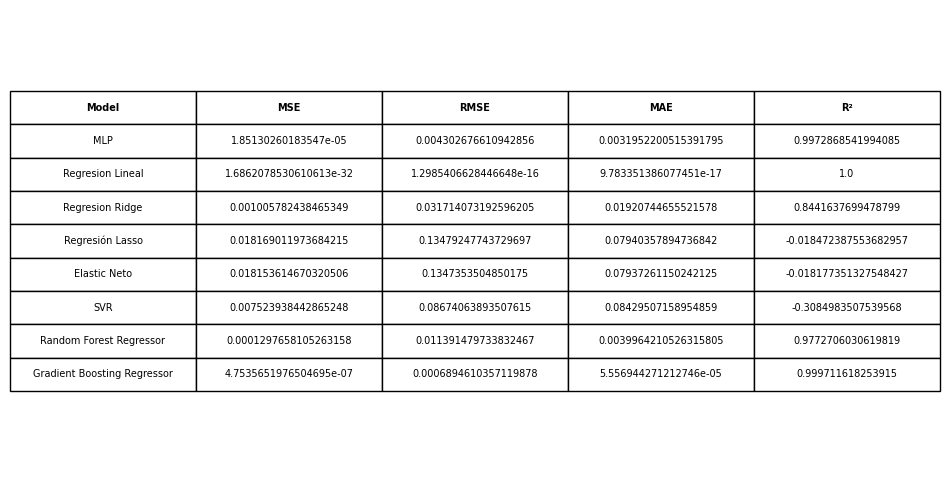

In [21]:
#MSE = [round(val, 10) for val in MSE]
#RMSE = [round(val, 10) for val in RMSE]
#MAE = [round(val, 102) for val in MAE]
#R_2 = [round(val, 10) for val in R_2]

data = {
    'Model': ['MLP', 'Regresion Lineal', 'Regresion Ridge', 'Regresión Lasso', 'Elastic Neto', 'SVR', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [MSE[0], MSE[1], MSE[2], MSE[3],MSE[4], MSE[5], MSE[6], MSE[7]],
    'RMSE': [RMSE[0], RMSE[1], RMSE[2], RMSE[3],RMSE[4], RMSE[5], RMSE[6], RMSE[7]],
    'MAE': [MAE[0], MAE[1], MAE[2], MAE[3],MAE[4], MAE[5], MAE[6], MAE[7]],
    'R²': [R_2[0], R_2[1], R_2[2], R_2[3],R_2[4], R_2[5], R_2[6], R_2[7]],
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear figura y ejes con tamaño más grande
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario

# Ocultar cuadrícula
ax.axis('tight')
ax.axis('off')

# Crear tabla
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Ajustar tamaño de la tabla
table.scale(1, 2)

# Hacer la primera fila (cabecera) en negrita
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')

# Mostrar tabla
plt.show()